<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/work/err/nifty_%25_above_50_dma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 1.5 MB/s eta 0:00:00


In [21]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd
import matplotlib.pyplot as plt


import duckdb
import pandas as pd

def calculate_percentage_above_moving_average(periods):
    # Connect to DuckDB
    conn = duckdb.connect("candle_data.duckdb")

    # Query only data from '2018-05-01' onwards
    query = """
        SELECT *
        FROM candle_table
        WHERE date >= '2018-05-01'
        ORDER BY date
    """
    # Read data into a Pandas DataFrame
    data = conn.execute(query).df()

    # Close connection
    conn.close()

    # Set index to 'date' and convert to DateTime
    data["date"] = pd.to_datetime(data["date"])
    data.set_index("date", inplace=True)

    # Calculate Exponential Moving Average (EMA)
    ma = data.ewm(span=periods, min_periods=periods).mean()

    # Compute percentage of stocks above moving average
    above_ma = data > ma
    percentage = (above_ma.sum(axis=1) / len(above_ma.columns)) * 100


    return percentage



# Calculate the percentage of stocks above their 200 DMA for each day
percentage_above_dma = calculate_percentage_above_moving_average(50)
percentage_50_dma=calculate_percentage_above_moving_average(10)
# Download the Bank Nifty index data







In [45]:
nifty = pd.read_csv('nifty50_data.csv')
# Set index to 'date' and convert to DateTime
nifty["date"] = pd.to_datetime(nifty["date"])
nifty.set_index("date", inplace=True)

In [46]:
# Reindex Bank Nifty index data to match percentage_above_dma
aligned_nifty_close = nifty['close']

aligned_nifty_close.head()

,close
date,
2019-09-03,10797.90
2019-09-04,10844.65
2019-09-05,10847.90
2019-09-06,10946.20
2019-09-09,11003.05


In [47]:
percentage_above_dma_30_ema=percentage_50_dma.rolling(window=30).mean()
percentage_above_dma_10_ema=percentage_50_dma.rolling(window=10).mean()
percemtage_above_dma_200_30=percentage_above_dma.rolling(window=55).mean()
percemtage_above_dma_200_10=percentage_above_dma.rolling(window=15).mean()

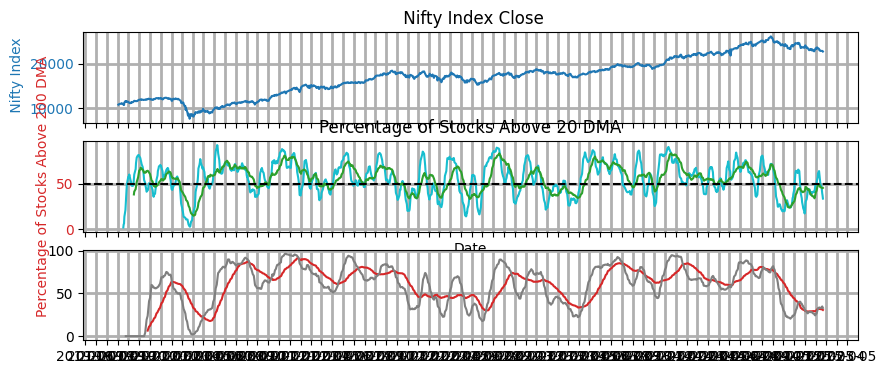

In [48]:
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, YearLocator
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10,4), sharex=True)

# Plot the Bank Nifty index close
ax1.set_ylabel(' Nifty Index', color='tab:blue')
ax1.plot(aligned_nifty_close.index, aligned_nifty_close, color='tab:blue', label='Nifty Index Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title(' Nifty Index Close')

# Plot the percentage of stocks above their 50 DMA
ax2.set_xlabel('Date')
ax2.set_ylabel('Percentage of Stocks Above 200 DMA', color='tab:red')
#ax2.plot(percentage_above_dma.index, percentage_above_dma, color='tab:red', label='Percentage Above 200 DMA')
ax2.plot(percentage_50_dma.index, percentage_above_dma_10_ema, color='tab:cyan', label='10-day Moving Average')
ax2.plot(percentage_50_dma.index, percentage_above_dma_30_ema, color='tab:green', label='30-day Moving Average')
ax3.plot(percentage_50_dma.index, percemtage_above_dma_200_30, color='tab:red', label='30-day Moving Average')
ax3.plot(percentage_50_dma.index, percemtage_above_dma_200_10, color='tab:grey', label='10-day Moving Average')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_title('Percentage of Stocks Above 20 DMA')
ax2.axhline(y=50, color='black', linestyle='dashed', label='50% Threshold')
#ax2.legend()

yloc = YearLocator()
mloc = MonthLocator()
ax1.xaxis.set_major_locator(mloc)
ax2.xaxis.set_major_locator(mloc)
ax3.xaxis.set_major_locator(mloc)
#ax[2].xaxis.set_major_locator(mloc)
ax1.grid(linewidth =2)
ax2.grid(linewidth =2)
ax3.grid(linewidth =2)


plt.show()


In [49]:
signal_S=np.where(percemtage_above_dma_200_10>percemtage_above_dma_200_30,1,-1)
signal=np.where(percentage_above_dma_10_ema>percentage_above_dma_30_ema,1,-1)
result=percentage_above_dma_10_ema#-percentage_above_dma_30_ema
result_L = percentage_above_dma_30_ema

In [50]:
aligned_nifty_close=aligned_nifty_close.tail(2000)
result=result.tail(2000)
result_L=result_L.tail(2000)

In [51]:
aligned_nifty_close.tail(5)

,close
date,
2025-02-17,22959.50
2025-02-18,22945.30
2025-02-19,22932.90
2025-02-20,22913.15
2025-02-21,22795.90


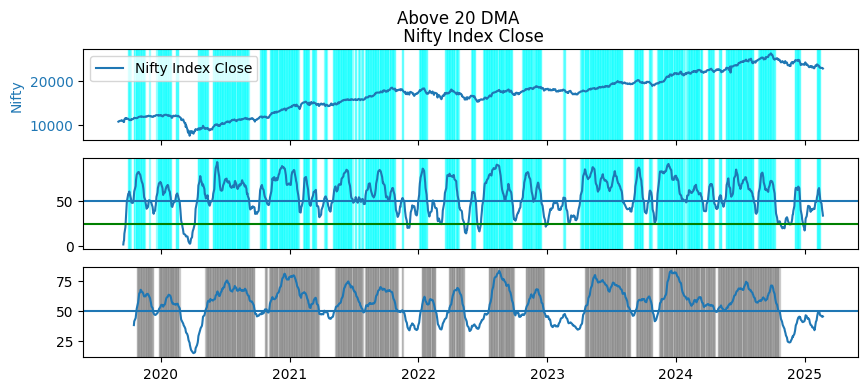

In [52]:
fig, (ax1, ax2,ax3) = plt.subplots(3, 1, figsize=(10,4), sharex=True)
ax1.set_ylabel(' Nifty Index', color='tab:blue')
ax1.plot(aligned_nifty_close.index, aligned_nifty_close, color='tab:blue', label='Nifty Index Close')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title(' Nifty Index Close')
ax2.plot(result , label='up')
ax3.plot(result_L , label='up')
ax1.legend(loc='upper left')
ax2.axhline(y=50)
ax3.axhline(y=50)
ax2.axhline(y=25,color='g')
ax1.set_ylabel('Nifty')
ax1.legend('ML Signal')
ax1.legend(loc='best')
fig.suptitle('Above 20 DMA')
# Highlighting the regions where Above 20 DMA is below -20
'''
below_threshold = result < 35

for i in range(1, len(aligned_nifty_close.index)):
    if below_threshold[i] and below_threshold[i-1]:
        ax1.axvspan(aligned_nifty_close.index[i-1], aligned_nifty_close.index[i], color='green', alpha=0.3)
        ax2.axvspan(aligned_nifty_close.index[i-1], aligned_nifty_close.index[i], color='green', alpha=0.3)
'''

below_threshold = result>50 #result < 22
below_threshold_L = result_L>50 #result < 22
for i in range(1, len(aligned_nifty_close.index)):
    if below_threshold[i] and below_threshold[i-1]:
        ax1.axvspan(aligned_nifty_close.index[i-1], aligned_nifty_close.index[i], color='cyan', alpha=0.3)
        ax2.axvspan(aligned_nifty_close.index[i-1], aligned_nifty_close.index[i], color='cyan', alpha=0.3)


for i in range(1, len(aligned_nifty_close.index)):
    if below_threshold_L[i] and below_threshold_L[i-1]:
        #ax1.axvspan(aligned_nifty_close.index[i-1], aligned_nifty_close.index[i], color='green', alpha=0.3)
        ax3.axvspan(aligned_nifty_close.index[i-1], aligned_nifty_close.index[i], color='gray', alpha=0.3)

plt.show()


In [53]:
result[-10:].to_csv('result.csv')

In [54]:
S=np.where(signal_S<0,signal,1)

-1


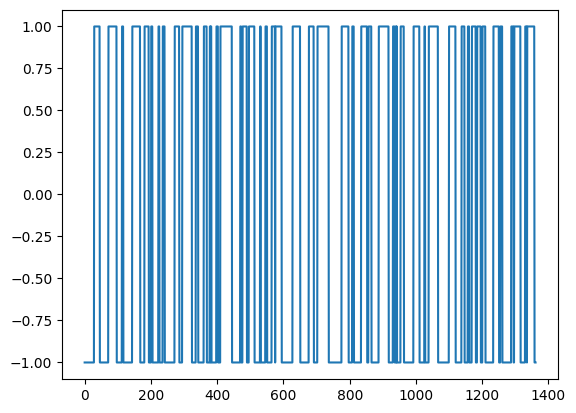

In [55]:
print(signal[-1])
pd.Series(signal).plot();

1


AttributeError: 'DataFrame' object has no attribute 'Close'

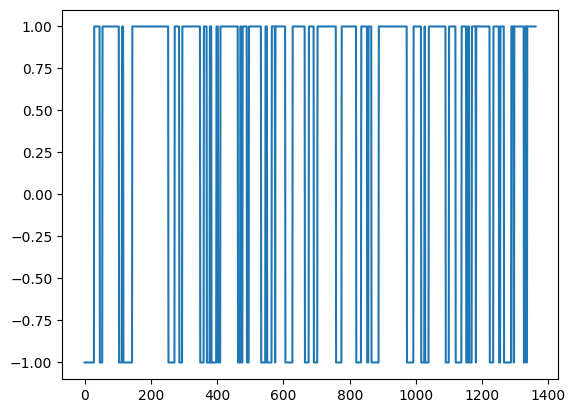

In [56]:
print(S[-1])
pd.Series(S).plot();
nifty.Close.reset_index().plot();

In [ ]:
nifty.Close.plot();

In [ ]:
aligned_nifty_close.index = aligned_nifty_close.index.tz_localize(None)
percentage_50_dma.index = percentage_50_dma.index.tz_localize(None)

result_df = pd.concat([aligned_nifty_close, percentage_50_dma], axis=1)


In [ ]:
signal.shape

In [ ]:
result_df.columns

In [ ]:
result_df['Position']=(np.where(signal>0,10,0))
# Calculate returns based on NEXT DAY's Open price
result_df['Returns'] = result_df['Close'].pct_change() * result_df['Position']

In [ ]:
initial_capital = 100000
result_df['Equity'] = initial_capital * (1 + result_df['Returns']).cumprod()
# Plot the Equity Curve
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.plot(result_df['Equity'], label='Equity')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity Curve : leverage 4')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
result_df['Position_short']=(np.where(signal<=0,-1,0))
# Calculate returns based on NEXT DAY's Open price
result_df['Return_shrt'] = result_df['Close'].pct_change() * result_df['Position_short']

In [ ]:
initial_capital = 100000
result_df['Equity_shrt'] = initial_capital * (1 + result_df['Return_shrt']).cumprod()
# Plot the Equity Curve
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.plot( result_df['Equity_shrt'], label='Equity')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity Curve : leverage 4')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:

result_df['Equity_total'] = result_df['Equity']#+result_df['Equity_shrt']
# Plot the Equity Curve
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.plot(result_df.Date, result_df['Equity_total'], label='Equity')
plt.xlabel('Date')
plt.ylabel('Equity')
plt.title('Equity Curve : leverage 1')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
def calculate_metrics(returns_series):
    """Calculates various trade metrics.

    Args:
        returns_series (pandas.Series): A Series of daily returns.

    Returns:
        dict: A dictionary containing the calculated metrics.
    """

    annualized_return = (1 + returns_series).prod() ** (252 / len(returns_series)) - 1
    annualized_std = returns_series.std() * np.sqrt(252)

    sharpe_ratio = annualized_return / annualized_std

    cumulative_returns = (1 + returns_series).cumprod()
    cumulative_max = cumulative_returns.cummax()
    drawdowns = cumulative_returns / cumulative_max - 1
    max_drawdown = drawdowns.min()
    calmar_ratio = annualized_return / abs(max_drawdown)

    # Calculate CAGR
    start_value = 1  # Initial investment
    end_value = (1 + returns_series).cumprod().iloc[-1]
    num_years = len(returns_series) / 252  # Assuming 252 trading days
    cagr = (end_value / start_value) ** (1 / num_years) - 1

    metrics = {
        'CAGR': cagr,
        'Annualized Return': annualized_return,
        'Annualized Volatility': annualized_std,
        'Sharpe Ratio': sharpe_ratio,
        'Calmar Ratio': calmar_ratio,
        'Max Drawdown': max_drawdown
    }

    return metrics

metrics = calculate_metrics(result_df['Returns']+result_df['Return_shrt'])


for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")